In [1]:
from keras.models import load_model
import tensorflow as tf
import pydot
from tensorflow.keras.models import Sequential
from nltk.corpus import stopwords
from collections import Counter

In [2]:
# Import required libraries
import PyPDF2
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from transformers import BertTokenizer, TFBertModel
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertForSequenceClassification
from transformers import BertTokenizer, BertForTokenClassification
import torch

In [3]:
pdf = open(r"C:\Users\PRASHANT\Untitled Folder 3\resume\pu.pdf", 'rb') #resume input

In [4]:
pdfReader = PyPDF2.PdfReader(pdf)

## Metadata:

In [5]:
pdfReader.metadata #About PDF

{'/Author': 'Prateek Kala',
 '/Creator': 'Microsoft® Word 2016',
 '/CreationDate': "D:20221205042833+00'00'",
 '/Producer': 'www.ilovepdf.com',
 '/ModDate': 'D:20221205042833Z'}

## Number of Pages in the Resume:

In [6]:
x= (len(pdfReader.pages))
print("Number of pages in the document:",x)

Number of pages in the document: 1


In [7]:
text = " "

In [8]:
for page_number in range(x):
    pdfReader = PyPDF2.PdfReader(pdf)
    if pdfReader.is_encrypted:
        pdfReader.decrypt('')
    page = pdfReader.pages[page_number]
    text += page.extract_text()

In [9]:
text

' CAREER  OBJECTIVE  \nTraining  and Certifications  \nJobs  and Responsibilities  \nCOMPUTER  SKILLS  \nACADEMIC  BACKGROUND  PRASHANT  UPADHYAY  \nPhone: +91  8954653528  \nEmail:  prashantupadhyay0@gmail.com  \nPrashant  is a career -oriented  professional  with decent  communication  and interpersonal  skills,  who knows  \nhow to make  sense  of data and translate  it into actionable  insights.  He is familiar  with gathering,  cleaning,  \nand organizing data for the use of technical and non -technical personnel. He is seeking a challenging  \nposition in a growth -oriented organization w here he can effectively contribute through his skills and  \nabilities.  \n \nCertifications:  \nInstitution:  Google  May,  2022  \nCertificate:  Google  Data  analytics  professional  certification  \n \nInstitution:  LinkedIn  Jul, 2021  \nCertificate:  Tableau  Essential  Training  (2020.1)  \nZummit Infolabs  Nov 2022  – Present  \nJr. Data  Scientist  \n\uf0b7 Writing  code  in Python , Te

In [10]:
pdf.close() # closing the pdf file object

## Data Pre-Processing:

In [11]:
text = re.sub('http\S+\s*', ' ', text)  # remove URLs
text = re.sub('RT|cc', ' ', text)  # remove RT and cc
text = re.sub('#\S+', '', text)  # remove hashtags
text = re.sub('@\S+', '  ', text)  # remove mentions
text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
text = re.sub(r'[0-9]+', '', text)
text = re.sub(r'[^\x00-\x7f]',r' ', text) 
text = re.sub('\s+', ' ', text)  # remove extra whitespace

In [12]:
# Convert all strings to lowercase
text = text.lower()

In [13]:
text2 = text

In [14]:
my_stopwords = ['example_stopword1', 'example_stopword2']

stop_words = set(stopwords.words('english'))
stop_words.update(my_stopwords)

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
#cachedStopWords = stopwords.words("english")
pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
text = pattern.sub('', text)

In [17]:
text

' career objective training certifications jobs responsibilities computer skills academic background prashant upadhyay phone email prashantupadhyay prashant career oriented professional decent communication interpersonal skills knows make sense data translate actionable insights familiar gathering cleaning organizing data use technical non technical personnel seeking challenging position growth oriented organization w effectively contribute skills abilities certifications institution google may certificate google data analytics professional certification institution linkedin jul certificate tableau essential training zummit infolabs nov present jr data scientist writing code python tensorflow keras projects related cnn gan rnn hospitality financial domain used jupyter collab notebooks machine learning deep learning problems yoshops com jun aug data science intern undertook process structured unstructured data analyze large amounts information discover trends patterns combined models en

## Extracted Text:

In [18]:
text

' career objective training certifications jobs responsibilities computer skills academic background prashant upadhyay phone email prashantupadhyay prashant career oriented professional decent communication interpersonal skills knows make sense data translate actionable insights familiar gathering cleaning organizing data use technical non technical personnel seeking challenging position growth oriented organization w effectively contribute skills abilities certifications institution google may certificate google data analytics professional certification institution linkedin jul certificate tableau essential training zummit infolabs nov present jr data scientist writing code python tensorflow keras projects related cnn gan rnn hospitality financial domain used jupyter collab notebooks machine learning deep learning problems yoshops com jun aug data science intern undertook process structured unstructured data analyze large amounts information discover trends patterns combined models en

In [19]:
#import string

In [20]:
# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [21]:
# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Job Title Detection:

In [22]:
# Function to encode a resume text into a BERT-compatible format
def encode_resume(resume_text):
    input_ids = torch.tensor(tokenizer.encode(resume_text, add_special_tokens=True)).unsqueeze(0)  # Batch size 1
    with torch.no_grad():
        outputs = model(input_ids)
    logits = outputs[0]
    return logits

In [23]:
# Define the job titles and their corresponding labels
job_titles = ['Advocate','Data Scientist', 'Software Engineer','Dotnet Developer' ,'Marketing Manager' , 'Java Developer','Operations Manager', 'DevOps Engineer', 'Python Developer', 'Blockchain', 'SAP Developer', 'ETL Developer']
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
# Function to classify a resume based on its job title
def classify_resume(resume_text):
    logits = encode_resume(resume_text)
    probs = torch.softmax(logits, dim=1)
    top_prob, top_label = probs.max(1)
    predicted_label = job_titles[top_label.item()]
    return predicted_label

In [25]:
# Example usage
predicted_label = classify_resume(text)
print("Predicted job title:", predicted_label)

Predicted job title: Advocate


## Word Frequency:

In [26]:
# Find frequency of each word in a string in Python
# using dictionary.
def count(elements):
    # check if each word has '.' at its last. If so then ignore '.'
    if elements[-1] == '.':
        elements = elements[0:len(elements) - 1]

    # if there exists a key as "elements" then simply
    # increase its value.
    if elements in dictionary:
        dictionary[elements] += 1

    # if the dictionary does not have the key as "elements"
    # then create a key "elements" and assign its value to 1.
    else:
        dictionary.update({elements: 1})

In [27]:
dictionary = {}

In [28]:
word_count2 = Counter(text2.split())

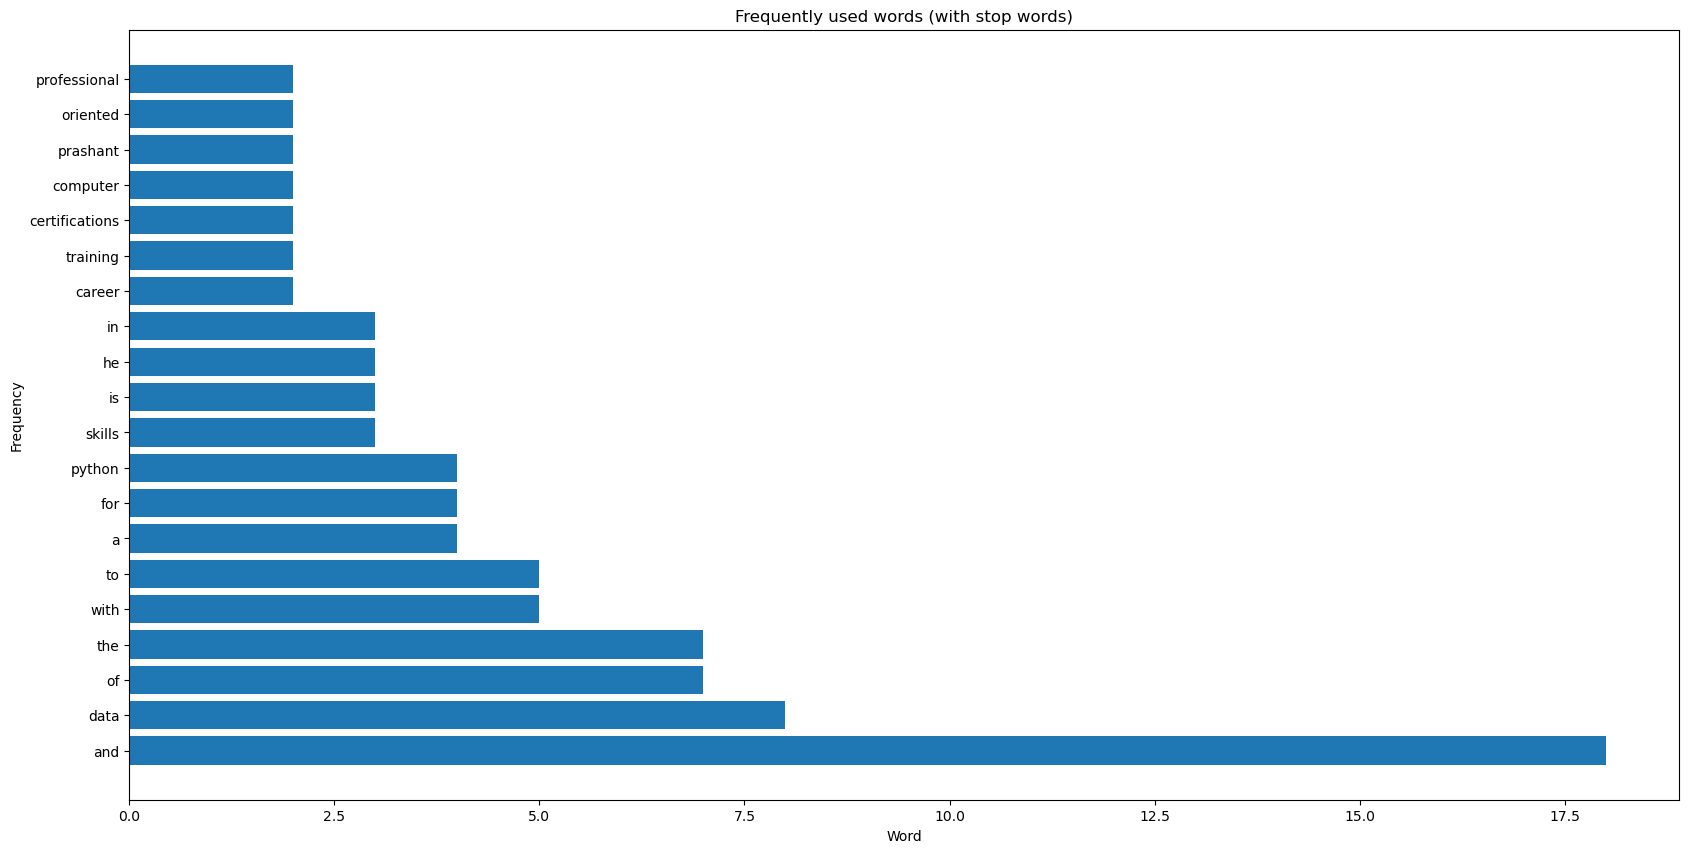

In [29]:
plt.figure(figsize=(20,10)) 
# Get the top 10 most frequent words
top_words2 = word_count2.most_common(20)

# Create a bar chart of the top words
plt.barh([word[0] for word in top_words2], [word[1] for word in top_words2])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Frequently used words (with stop words)')
plt.show()

In [30]:
word_count2 = Counter(text.split())

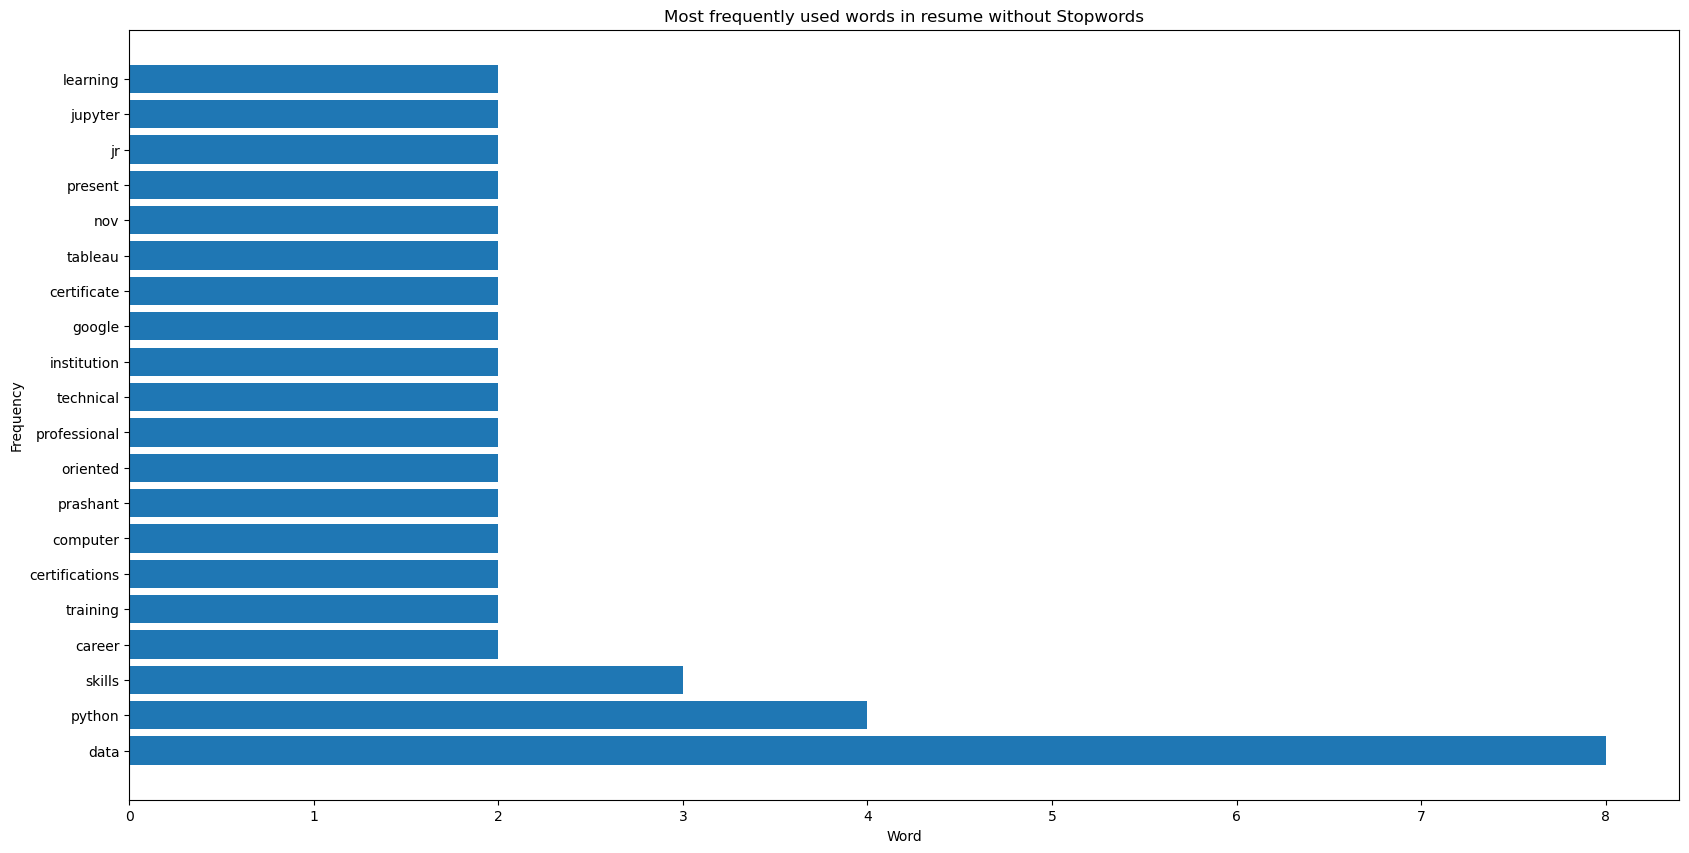

In [31]:
# Get the top 10 most frequent words
top_words = word_count2.most_common(20)

plt.figure(figsize=(20,10))

# Create a bar chart of the top words
plt.barh([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most frequently used words in resume without Stopwords')
plt.show()

## Level Classifier using BERT:

In [32]:
# Load the pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define the categories
categories = {
    'Entry-level': 0,
    'Mid-level': 1,
    'Senior-level': 2
}

# Define a function to classify a resume
def classify_resume(resume):
    # Tokenize the resume
    input_ids = tokenizer.encode(resume, add_special_tokens=True, truncation=True, max_length=512)
    input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension

    # Run the resume through the model
    outputs = model(input_ids)
    logits = outputs.logits
    prediction = logits.argmax(dim=-1).item()

    # Map the prediction to the corresponding category
    for category, label in categories.items():
        if label == prediction:
            return category
    return None

# Test the function with a sample resume
resume = text
category = classify_resume(resume)
print(category)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Entry-level


In [46]:
# # Load the pre-trained tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=4)

# # Define the categories
# categories = {
#     'B-KEYWORD': 1,  # Beginning of a keyword
#     'I-KEYWORD': 2,  # Inside a keyword
#     'O': 0,          # Outside a keyword
# }

# # Define a function to extract keywords from a resume
# def extract_keywords(resume):
#     # Tokenize the resume
#     input_ids = tokenizer.encode(resume, add_special_tokens=True, truncation=True, max_length=512)
#     input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension

#     # Run the resume through the model
#     outputs = model(input_ids)
#     logits = outputs.logits
#     predictions = logits.argmax(dim=-1).tolist()[0]

#     # Map the predictions to keywords
#     keywords = []
#     current_keyword = []
#     for i, prediction in enumerate(predictions):
#         if prediction == categories['B-KEYWORD']:
#             current_keyword.append(tokenizer.convert_ids_to_tokens([input_ids[0][i].item()])[0])
#         elif prediction == categories['I-KEYWORD']:
#             current_keyword.append(tokenizer.convert_ids_to_tokens([input_ids[0][i].item()])[0])
#         else:
#             if current_keyword:
#                 keywords.append(' '.join(current_keyword))
#                 current_keyword = []
#     if current_keyword:
#         keywords.append(' '.join(current_keyword))
#     return keywords

# # Test the function with a sample resume
# resume = text
# keywords = extract_keywords(resume)
# print(keywords)

In [34]:
# # Load pre-trained BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=7)

# # Define labels for named entities (company names, job titles, locations)
# labels = ['O', 'B-ORG', 'I-ORG', 'B-JOB', 'I-JOB', 'B-LOC', 'I-LOC']

# # Define a function for performing NER using BERT
# def bert_ner(text):
#     # Tokenize input text
#     tokens = tokenizer.encode(text, add_special_tokens=True)
#     # Convert tokenized input to tensors
#     input_ids = torch.tensor([tokens])
#     # Perform forward pass through BERT model
#     outputs = model(input_ids)
#     # Get predicted labels for each token
#     predictions = torch.argmax(outputs[0], dim=2).detach().cpu().numpy()[0]
#     # Convert token IDs to tokens
#     tokens = tokenizer.convert_ids_to_tokens(tokens)
#     # Extract named entities
#     entities = []
#     current_entity = None
#     for token, prediction in zip(tokens[1:-1], predictions[1:-1]):
#         label = labels[prediction]
#         if label.startswith('B-'):
#             current_entity = {'entity': token, 'label': label[2:]}
#         elif label.startswith('I-'):
#             if current_entity:
#                 current_entity['entity'] += ' ' + token
#         else:
#             if current_entity:
#                 entities.append(current_entity)
#                 current_entity = None
#     if current_entity:
#         entities.append(current_entity)
#     return entities

# # Example usage
# # text = text
# entities = bert_ner(text)
# print(entities)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

[{'entity': 'career', 'label': 'ORG'}, {'entity': 'pr ##ash', 'label': 'JOB'}, {'entity': '##hya ##y phone', 'label': 'ORG'}, {'entity': '##ad', 'label': 'JOB'}, {'entity': '##ash', 'label': 'LOC'}, {'entity': 'use technical non technical personnel', 'label': 'JOB'}, {'entity': 'google may certificate google data analytics', 'label': 'JOB'}, {'entity': 'certification', 'label': 'ORG'}, {'entity': '##in', 'label': 'LOC'}, {'entity': 'nov', 'label': 'LOC'}, {'entity': 'used', 'label': 'JOB'}, {'entity': 'yo', 'label': 'LOC'}, {'entity': '##ps com', 'label': 'LOC'}, {'entity': 'intern', 'label': 'LOC'}, {'entity': '##born mat ##pl ##ot', 'label': 'LOC'}, {'entity': 'scraping', 'label': 'LOC'}, {'entity': 'time data', 'label': 'LOC'}, {'entity': '##e files', 'label': 'JOB'}, {'entity': '##rt', 'label': 'JOB'}, {'entity': '##rga', 'label': 'JOB'}, {'entity': 'aug', 'label': 'LOC'}, {'entity': '##ggle languages python c c', 'label': 'JOB'}, {'entity': 'university', 'label': 'LOC'}, {'entity'

In [35]:
# pip install sentence-transformers

In [36]:
# pip install bert-extractive-summarizer

## Summariser

In [37]:
from transformers import pipeline

# Load the BERT summarization pipeline
summarizer = pipeline("summarization")

# Define the text to summarize
text = text2

# Set the maximum length of the summary in words
max_length = 200

# Generate the summary using the BERT model
summary = summarizer(text, max_length=max_length, min_length=10)

# Print the summary
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 prashant upadhyay is a career oriented professional with decent communication and interpersonal skills . He is seeking a challenging position in a growth oriented organization . He can effectively contribute through his skills and abilities .


## Resume Strength Score:

In [38]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

# Define labels and scores for classification
labels = ['0-3', '4-6', '7-8', '9-10']

# Tokenize resume text and prepare it for input to BERT model
input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding=True, return_tensors='pt')
input_ids = torch.tensor(input_ids)

# Predict score for input resume text
outputs = model(input_ids)[0]
_, predicted_score = torch.max(outputs, 1)
predicted_score = predicted_score.item()

# Print score based on predicted label
print(f"Based on your resume, we give you a score of {labels[predicted_score]}.")
if predicted_score == 0:
    print("Your resume needs significant improvement. Consider seeking professional help.")
elif predicted_score == 1:
    print("Your resume could be stronger. Consider highlighting your achievements and quantifiable results.")
elif predicted_score == 2:
    print("Your resume is good, but there's still room for improvement. Consider customizing it for each job you apply for.")
else:
    print("Your resume is excellent! Keep up the good work.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Based on your resume, we give you a score of 7-8.
Your resume is good, but there's still room for improvement. Consider customizing it for each job you apply for.


In [39]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define labels for classification
labels = ['do not Recommend', 'Recommend']

# Tokenize resume text and prepare it for input to BERT model
input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding=True, return_tensors='pt')
input_ids = torch.tensor(input_ids)

# Predict label for input resume text
outputs = model(input_ids)[0]
_, predicted_label = torch.max(outputs, 1)
predicted_label = predicted_label.item()

# Print recommendation based on predicted label
print(f"Based on your resume, we {labels[predicted_label]} resume writing tips.")
if predicted_label == 0:
    print("Consider improving your resume by focusing on your skills and accomplishments.")
else:
    print("Great job! Your resume is already strong. Consider highlighting your achievements and quantifiable results.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Based on your resume, we do not Recommend resume writing tips.
Consider improving your resume by focusing on your skills and accomplishments.


In [40]:
# Load the pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define resume writing tips and suggestions
tips = {
    "Education": "Add information about your educational background, including your degree, major, and GPA.",
    "Experience": "Provide detailed information about your work experience, including your job titles, responsibilities, and accomplishments.",
    "Skills": "List relevant skills that you have, including technical skills and soft skills such as communication and teamwork.",
    "Achievements": "Include any notable achievements, such as awards or recognition you have received.",
    "Formatting": "Use a clear and easy-to-read format, with consistent formatting throughout your resume.",
}

# Define a function to provide resume writing tips and suggestions
def get_resume_tips(resume_text):
    # Tokenize the resume text
    input_ids = tokenizer.encode(resume_text, add_special_tokens=True, return_tensors='pt')

    # Make a prediction with the BERT model
    with torch.no_grad():
        outputs = model(input_ids)
        predicted_class = torch.argmax(outputs[0])

    # Return the corresponding resume writing tip
    if predicted_class == 0:
        return "Your resume looks great! Keep up the good work."
    else:
        return "Here are some tips to improve your resume:\n" + "\n".join([tips[t] for t in tips])

# Example usage
# resume_text = "I am an experienced software engineer with a degree in computer science. I have worked on several projects using Python, Java, and C++. My skills include problem solving, teamwork, and communication. In my free time, I enjoy participating in hackathons and contributing to open-source projects."
tips = get_resume_tips(text)
print(tips)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Your resume looks great! Keep up the good work.


In [41]:
# import pandas as pd
# import torch
# import transformers as ppb

# # Load pre-trained BERT tokenizer
# tokenizer = ppb.BertTokenizer.from_pretrained('bert-base-uncased')

# # Load pre-trained BERT model
# model = ppb.BertForSequenceClassification.from_pretrained('bert-base-uncased')

# # Load resumes dataset
# resumes_df = pd.read_csv(r'C:\Users\PRASHANT\Untitled Folder 3\resume\dot2.pdf')

# # Encode resumes and labels
# encoded_resumes = [tokenizer.encode(resume, add_special_tokens=True) for resume in resumes_df['resume_text']]
# labels = resumes_df['category']

# # Pad encoded resumes to the same length
# max_len = max([len(resume) for resume in encoded_resumes])
# padded_resumes = [resume + [0]*(max_len-len(resume)) for resume in encoded_resumes]

# # Convert data to PyTorch tensors
# input_ids = torch.tensor(padded_resumes)
# attention_mask = torch.where(input_ids != 0, torch.tensor(1), torch.tensor(0))
# labels = torch.tensor(labels)

# # Define optimizer and loss function
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
# loss_fn = torch.nn.CrossEntropyLoss()

# # Train model
# for epoch in range(3):
#     model.train()
#     optimizer.zero_grad()
#     outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#     loss = outputs.loss
#     loss.backward()
#     optimizer.step()
#     print('Epoch:', epoch, ' Loss:', loss.item())

# # Save fine-tuned model
# # model.save_pretrained('fine_tuned_resume_model')

In [42]:
# Create dictionary with industrial and system engineering key terms by area
terms = {'Quality/Six Sigma':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Quality assurance':['requirement analysis', 'writing test cases', 'executing test cases', 'logging defects and tracking', 
                        'preparing test reports', 'Agile Methodology', 'Test Automation', 'Continuous Integration', 'Scrum', 
                        'Selenium', 'QTP', 'Jmeter','SDLC', 'STLC''requirement analysis', 'writing test cases', 
                        'executing test cases', 'logging defects and tracking','preparing test reports', 
                        'Agile Methodology', 'Test Automation', 'Continuous Integration', 'Scrum', 'Selenium', 
                        'QTP', 'Jmeter', 'SDLC', 'STLC'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
         'Legals':['Contract Preparation' , 'HIPAA Compliance' , 'Motions' , 'Pleadings' , 'Discovery Requests & Responses' , 
                           'Legal Research & Correspondence' , 'Docket Management' , 'Memorandums' , 'Arguments' , 'Mediation' , 'Compliance' 
                           , 'Problem Solving' , 'Client Relations' , 'Public Speaking' , 'Project Management' , 'Litigation' , 'Depositions' 
                           , 'Trial Preparation' , 'Insurance Reporting' , 'Negotiation Strategies'],
         'Data Science':['analytics','CNN', 'MTCNN', 'Data Science', 'GAN', 'api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','machine learning','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system']}

In [43]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0
DataScience =0
Legal = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Legal':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(Legal)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Data Science':
        for word in terms[area]:
            if word in text:
                DataScience +=1
        scores.append(DataScience)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

In [44]:
# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data analytics,13
Data Science,12
Project management,2
Healthcare,2
Quality/Six Sigma,1
Operations management,1
Supply chain,0
Quality assurance,0
Legals,0


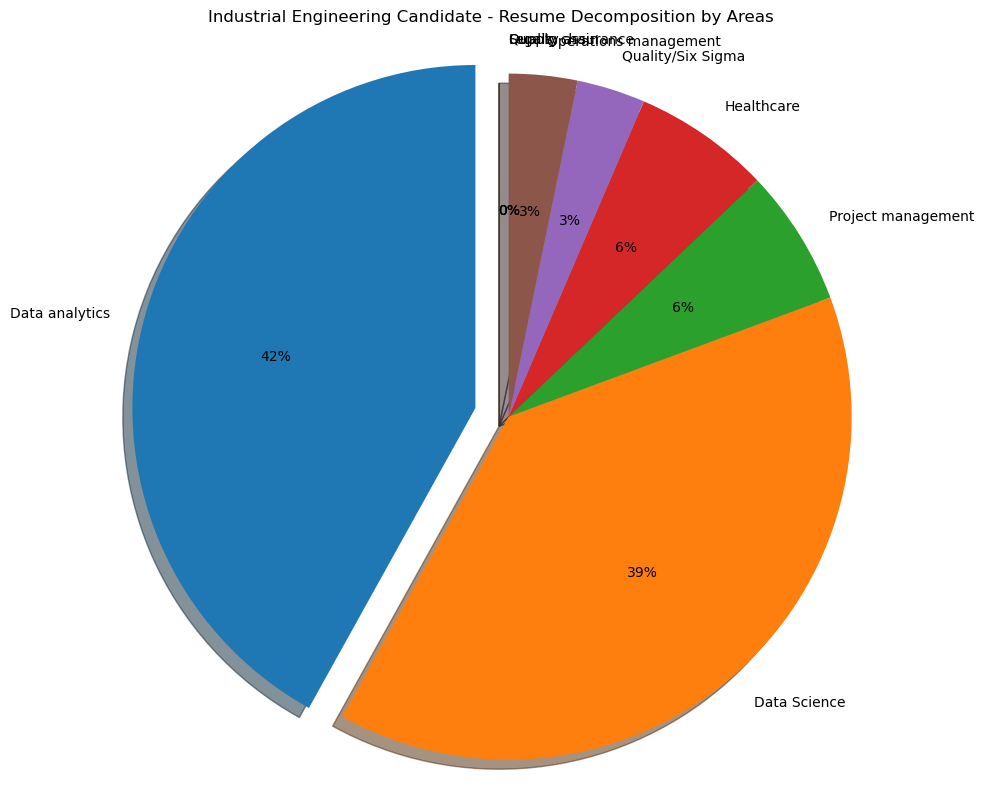

In [45]:
# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0.1,0,0,0,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()
# Save pie chart as a .png file
#pie.savefig('resume_screening_results.png')